In [4]:
from google.colab import files
import pandas as pd


uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [5]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace = True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
scaling = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


In [8]:
df = pd.get_dummies(data=df, columns=['Geography', 'Gender'])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [9]:
 from sklearn.preprocessing import MinMaxScaler
 scaler = MinMaxScaler()
 df[scaling]= scaler.fit_transform(df[scaling])

In [15]:
y_columns = ['Gender_Female', 'Geography_Spain', 'Geography_Germany']

for col in y_columns:
  df[col].replace({True: 1, False: 0}, inplace=True)

In [10]:
df



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,True,False,False,True,False
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,False,False,True,True,False
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,True,False,False,True,False
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,True,False,False,True,False
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,True,False,False,False,True
9996,0.332,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,True,False,False,False,True
9997,0.718,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,True,False,False,True,False
9998,0.844,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,False,True,False,False,True


In [11]:
df.drop(columns=['Gender_Male', 'Geography_France'], inplace=True)

Correlation Matrix

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

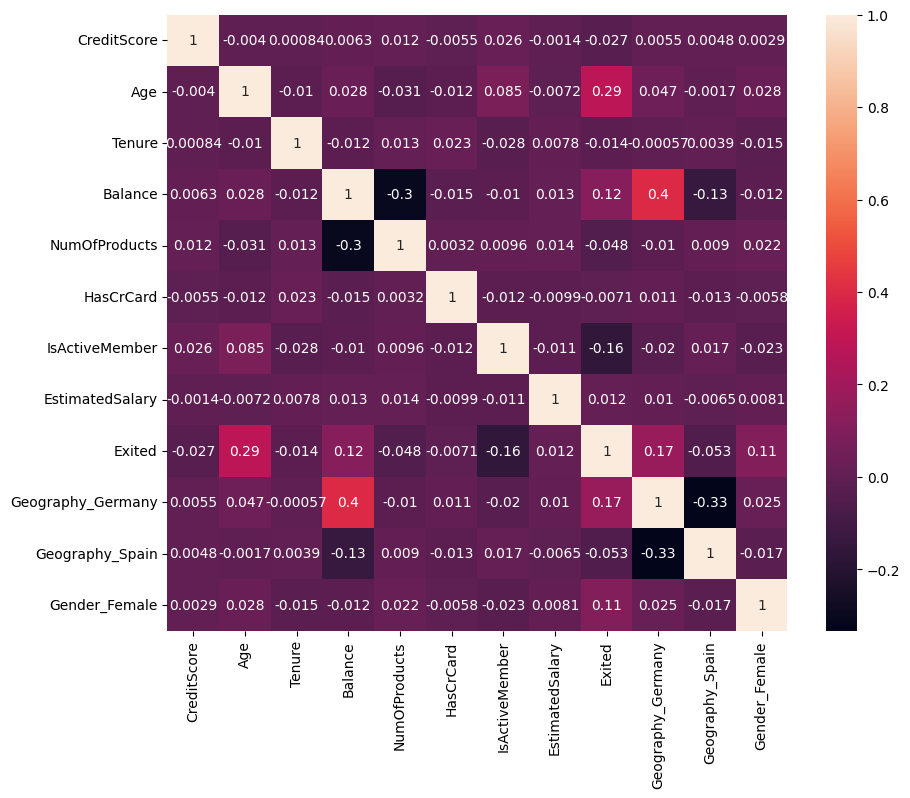

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True)

In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [33]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(5, input_shape=(11,), activation='relu'), # Pass input_shape as an argument
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5925 - accuracy: 0.7308
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.7933
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7936
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7946
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7990
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8019
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8048
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.8054
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4440 - accura

In [49]:
yp = model.predict(X_test)
import numpy as np
yp[:15]
for i in range(len(yp)):
  if yp[i] > 0.5:
    yp[i] = 1
  else:
    yp[i] = 0

63/63 [==============================] - 0s 2ms/step


In [47]:
y_test[:15]

7750    0.0
7793    0.0
4735    0.0
536     0.0
7238    1.0
396     0.0
5524    0.0
5194    0.0
8102    0.0
4785    0.0
6839    0.0
8600    1.0
3141    1.0
3057    0.0
774     1.0
Name: Exited, dtype: float32

In [50]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1617
         1.0       0.66      0.35      0.46       383

    accuracy                           0.84      2000
   macro avg       0.76      0.65      0.68      2000
weighted avg       0.82      0.84      0.82      2000



In [35]:
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [31]:
X_train.shape

(8000, 11)